## Análise Exploratória

Arquivo "covid_19_clean_complete.csv"

#   Bibliotecas

In [106]:
import pandas as pd
import seaborn as sns

#   Carregamento de dados

In [107]:
path_covid_19_clean = r'C:\Users\angel\Desktop\Data science\GitHub\GitHub\btc2-blue-g4\src\Dados\kaggle\covid_19_clean_complete.csv'
path_worldmeter = r'C:\Users\angel\Desktop\Data science\GitHub\GitHub\btc2-blue-g4\src\Dados\kaggle\worldometer_data.csv'
path_country_wise = r'C:\Users\angel\Desktop\Data science\GitHub\GitHub\btc2-blue-g4\src\Dados\kaggle\country_wise_latest.csv'
path_full_grouped = r'C:\Users\angel\Desktop\Data science\GitHub\GitHub\btc2-blue-g4\src\Dados\kaggle\full_grouped.csv'

In [108]:
'''
Input:
        3 parametros, um para cada um dos 3 datasets usados para a junção em apenas um, dataset covid_19_clean, worldmeter e full_grouped;

Função:
        Junta os 3 em duas etapas, uma criando um df3, aonde baseado no pais do dataset covid_19_clean, 
        ele recebe as informações de continente e população, vindos
        do dataset worldmeter.

        Para gerar o df4, o df3 é juntado com o df full_grouped, recebendo "New cases","New deaths".

        Ainda são removidos algumas colunas e criadas as colunas , "month e "day".

        Colunas são reordenadas.

output: 
        Retorna o df final.

'''

def gerar_df(path_covid_19_clean,path_worldmeter, path_full_grouped):

    df0 = pd.read_csv(path_covid_19_clean)
    df1 = pd.read_csv(path_worldmeter)
    df2 = pd.read_csv(path_full_grouped )

    df3 = pd.merge(df0, df1[["Continent","Population","Country/Region"]], on=["Country/Region"], how="left")
    
    df4 = pd.merge(df3, df2[["New cases","New deaths","Date", "Country/Region"]], on=["Date","Country/Region" ], how="left")

    df4= df4.drop(["Lat","Long", 
                   "Province/State", 
                   "WHO Region"], axis=1)

    

    
    df4["Date"] = pd.to_datetime(df4["Date"])

    df4["day"] = df4['Date'].map(lambda x: x.day)
    df4["month"] = df4['Date'].map(lambda x: x.month)

    df4 = df4[["Country/Region",
            "Continent", 
            "Population",
            "Date", 
            "month",
            "day", 
            "Confirmed", 
            "Deaths", 
            "Recovered", "Active", 
            "New cases", 
            "New deaths"]]

    df4.rename(columns={
    'Province/State': 'province_state',
    'Country/Region': 'country_region',
    },inplace=True)

    df4.columns = df4.columns.str.lower()

           
    return df4
    


# Análise exploratória 

In [109]:
df = gerar_df(path_covid_19_clean,path_worldmeter, path_full_grouped)

In [110]:
df.head()

,country_region,continent,population,date,month,day,confirmed,deaths,recovered,active,new cases,new deaths
0,Afghanistan,Asia,39009447.0,2020-01-22,1,22,0,0,0,0,0,0
1,Albania,Europe,2877470.0,2020-01-22,1,22,0,0,0,0,0,0
2,Algeria,Africa,43926079.0,2020-01-22,1,22,0,0,0,0,0,0
3,Andorra,Europe,77278.0,2020-01-22,1,22,0,0,0,0,0,0
4,Angola,Africa,32956300.0,2020-01-22,1,22,0,0,0,0,0,0


In [111]:
df.continent.unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Australia/Oceania', nan], dtype=object)

In [112]:
df.describe()

,population,month,day,confirmed,deaths,recovered,active,new cases,new deaths
count,3.816400e+04,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04,49068.000000,49068.000000
mean,3.422684e+07,4.281915,15.957447,1.688490e+04,884.179160,7.915713e+03,8.085012e+03,532.097151,34.272296
std,1.031766e+08,1.810241,8.770100,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04,2671.539240,142.310486
min,3.393800e+04,1.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01,0.000000,-1918.000000
25%,3.278650e+06,3.000000,8.000000,4.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,1.168846e+07,4.000000,16.000000,1.680000e+02,2.000000,2.900000e+01,2.600000e+01,11.000000,0.000000
75%,3.777502e+07,6.000000,24.000000,1.518250e+03,30.000000,6.660000e+02,6.060000e+02,179.000000,4.000000
max,1.381345e+09,7.000000,31.000000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.000000,3887.000000


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49068 entries, 0 to 49067
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   country_region  49068 non-null  object        
 1   continent       38164 non-null  object        
 2   population      38164 non-null  float64       
 3   date            49068 non-null  datetime64[ns]
 4   month           49068 non-null  int64         
 5   day             49068 non-null  int64         
 6   confirmed       49068 non-null  int64         
 7   deaths          49068 non-null  int64         
 8   recovered       49068 non-null  int64         
 9   active          49068 non-null  int64         
 10  new cases       49068 non-null  int64         
 11  new deaths      49068 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(8), object(2)
memory usage: 4.9+ MB


#   Tratamentos dados nulos

In [114]:
df_nulls = df.loc[df.continent.isna()]

In [115]:
df_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10904 entries, 29 to 49059
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   country_region  10904 non-null  object        
 1   continent       0 non-null      object        
 2   population      0 non-null      float64       
 3   date            10904 non-null  datetime64[ns]
 4   month           10904 non-null  int64         
 5   day             10904 non-null  int64         
 6   confirmed       10904 non-null  int64         
 7   deaths          10904 non-null  int64         
 8   recovered       10904 non-null  int64         
 9   active          10904 non-null  int64         
 10  new cases       10904 non-null  int64         
 11  new deaths      10904 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(8), object(2)
memory usage: 1.1+ MB


In [116]:
df_nulls.country_region.unique()

array(['Brunei', 'Central African Republic', 'China',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', "Cote d'Ivoire",
       'Holy See', 'South Korea', 'Saint Vincent and the Grenadines',
       'Taiwan*', 'United Arab Emirates', 'United Kingdom', 'US',
       'West Bank and Gaza', 'Kosovo', 'Burma'], dtype=object)

In [117]:
df_pop_nulls = df.loc[df.population.isna()]

df_pop_nulls.country_region.unique()

array(['Brunei', 'Central African Republic', 'China',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', "Cote d'Ivoire",
       'Holy See', 'South Korea', 'Saint Vincent and the Grenadines',
       'Taiwan*', 'United Arab Emirates', 'United Kingdom', 'US',
       'West Bank and Gaza', 'Kosovo', 'Burma'], dtype=object)

In [118]:
df.continent.unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Australia/Oceania', nan], dtype=object)

In [156]:
def filling_nulls(df):
    if df["country_region"] == 'Brunei':
       df["continent"] = 'Asia' 
       df["population"] = 460345

    elif df["country_region"] == 'Central African Republic':
         df["continent"] = 'Africa' 
         df["population"] = 5454533

    elif df["country_region"] == 'China':
         df["continent"] = 'Asia' 
         df["population"] = 1411778724
          
    elif df["country_region"] == 'Congo (Brazzaville)':
         df["continent"] = 'Africa' 
         df["population"] = 5518000

    elif df["country_region"] == 'Congo (Kinshasa)':
         df["continent"] = 'Africa' 
         df["population"] = 89560000

    elif df["country_region"] == "Cote d'Ivoire":
         df["continent"] = 'Africa' 
         df["population"] = 27050000

    elif df["country_region"] == 'Holy See':
         df["continent"] = 'Europe' 
         df["population"] = 801
         
    elif df["country_region"] == 'South Korea':
         df["continent"] = 'Asia' 
         df["population"] = 51269185

    elif df["country_region"] == 'Saint Vincent and the Grenadines':
         df["continent"] = 'North America' 
         df["population"] = 111269

    elif df["country_region"] == 'Taiwan*':
         df["continent"] = 'Asia' 
         df["population"] = 23570000

    elif df["country_region"] == 'United Arab Emirates':
         df["continent"] = 'Asia' 
         df["population"] = 9890000

    elif df["country_region"] == 'United Kingdom':
         df["continent"] = 'Europe' 
         df["population"] = 67330000

    elif df["country_region"] == 'US':
         df["continent"] = 'North America' 
         df["population"] = 331900000
         
    elif df["country_region"] == 'West Bank and Gaza':
         df["continent"] = 'Asia' 
         df["population"] = 5101414 
    
    elif df["country_region"] == 'Kosovo':
         df["continent"] = 'Asia' 
         df["population"] = 1810000

    elif df["country_region"] == 'Burma':
         df["continent"] = 'Asia' 
         df["population"] = 54410000
     
    df["death / 100.000 hab"] = (df["deaths"]/df["population"])*100000
  
         
    return df

In [157]:
df = df.apply(lambda x : filling_nulls(x), axis=1) 

#  Análise Filiais

In [158]:
df_filial = df.loc[ 
        (df.country_region == 'Spain') | 
        (df.country_region == 'Ecuador') | 
        (df.country_region == 'Chile') | 
        (df.country_region == 'Mexico') | 
        (df.country_region == 'Argentina')]
                                

In [159]:
df_filial

,country_region,continent,population,date,month,day,confirmed,deaths,recovered,active,new cases,new deaths,death / 100.000 Hab,death / 100.000 hab
6,Argentina,South America,45236884.0,2020-01-22,1,22,0,0,0,0,0,0,0.000000,0.000000
47,Chile,South America,19132514.0,2020-01-22,1,22,0,0,0,0,0,0,0.000000,0.000000
95,Ecuador,South America,17668824.0,2020-01-22,1,22,0,0,0,0,0,0,0.000000,0.000000
156,Mexico,North America,129066160.0,2020-01-22,1,22,0,0,0,0,0,0,0.000000,0.000000
199,Spain,Europe,46756648.0,2020-01-22,1,22,0,0,0,0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48813,Argentina,South America,45236884.0,2020-07-27,7,27,167416,3059,72575,91782,4890,120,6.762181,6.762181
48854,Chile,South America,19132514.0,2020-07-27,7,27,347923,9187,319954,18782,2133,75,48.017736,48.017736
48902,Ecuador,South America,17668824.0,2020-07-27,7,27,81161,5532,34896,40733,467,17,31.309384,31.309384
48963,Mexico,North America,129066160.0,2020-07-27,7,27,395489,44022,303810,47657,4973,342,34.108088,34.108088


-   Número de mortes

<AxesSubplot: xlabel='date', ylabel='deaths'>

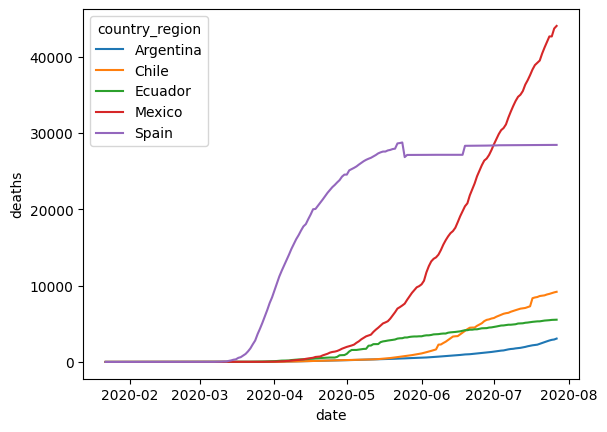

In [160]:
sns.lineplot(x="date", y="deaths", hue="country_region", data=df_filial)

<AxesSubplot: xlabel='date', ylabel='deaths'>

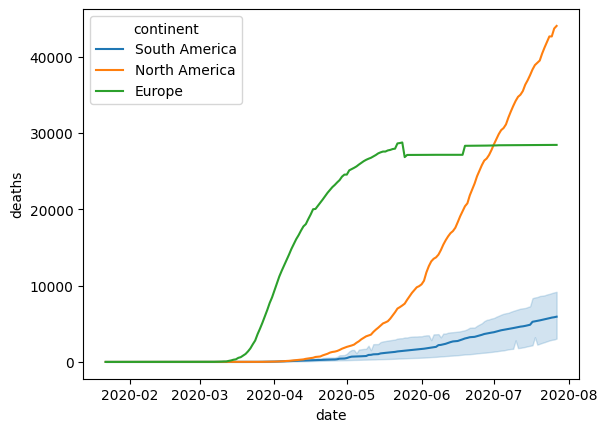

In [161]:
sns.lineplot(x="date", y="deaths", hue="continent", data=df_filial)

-   Numero de casos

<AxesSubplot: xlabel='date', ylabel='confirmed'>

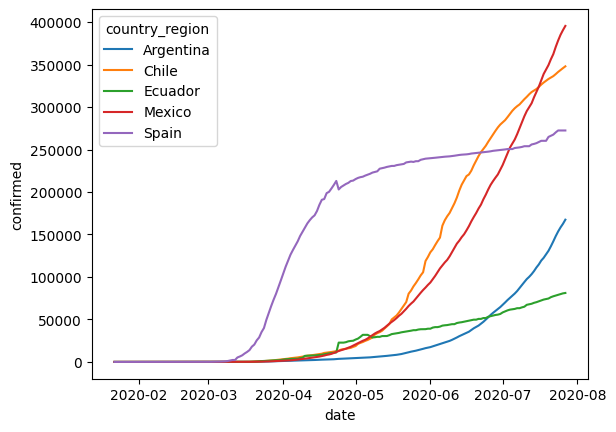

In [162]:
sns.lineplot(x="date", y="confirmed", hue="country_region", data=df_filial)

<AxesSubplot: xlabel='date', ylabel='confirmed'>

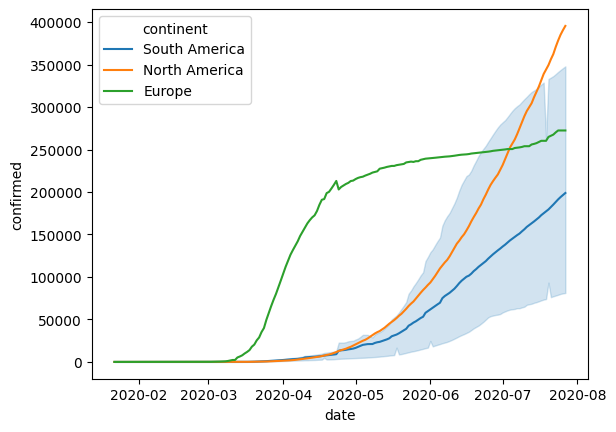

In [163]:
sns.lineplot(x="date", y="confirmed", hue="continent", data=df_filial)

-   death / 100.000 hab

<AxesSubplot: xlabel='month', ylabel='death / 100.000 hab'>

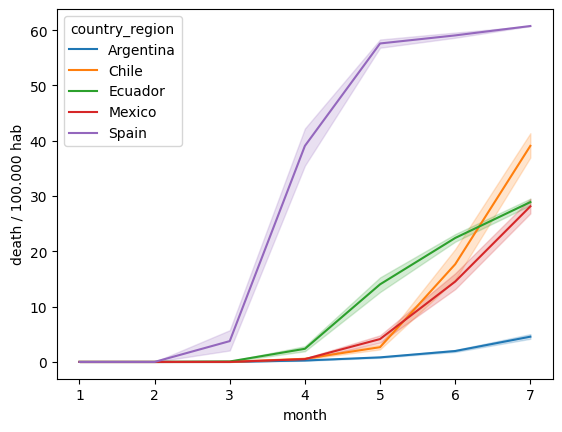

In [164]:
sns.lineplot(x="month", y="death / 100.000 hab", hue="country_region", data=df_filial)

<AxesSubplot: xlabel='date', ylabel='death / 100.000 hab'>

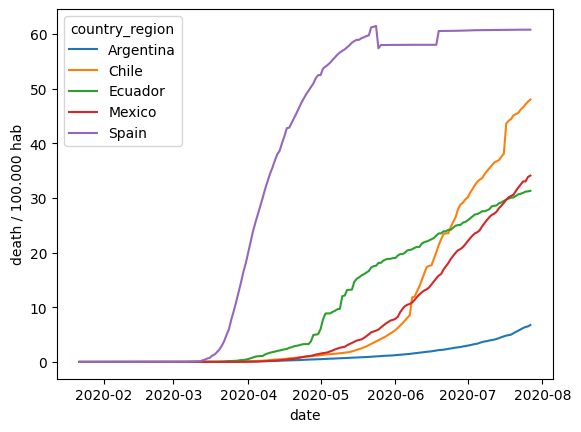

In [165]:
sns.lineplot(x="date", y="death / 100.000 hab", hue="country_region", data=df_filial)

<AxesSubplot: xlabel='month', ylabel='death / 100.000 hab'>

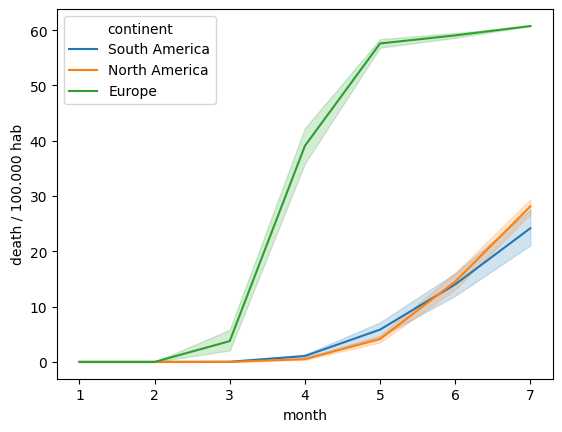

In [166]:
sns.lineplot(x="month", y="death / 100.000 hab", hue="continent", data=df_filial)

<AxesSubplot: xlabel='date', ylabel='death / 100.000 hab'>

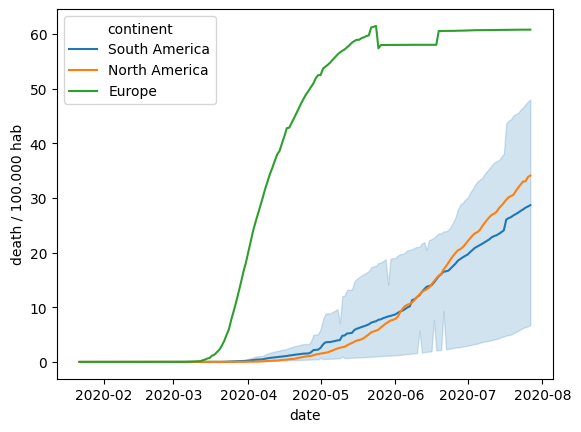

In [167]:
sns.lineplot(x="date", y="death / 100.000 hab", hue="continent", data=df_filial)

-   Recuperados

<AxesSubplot: xlabel='month', ylabel='recovered'>

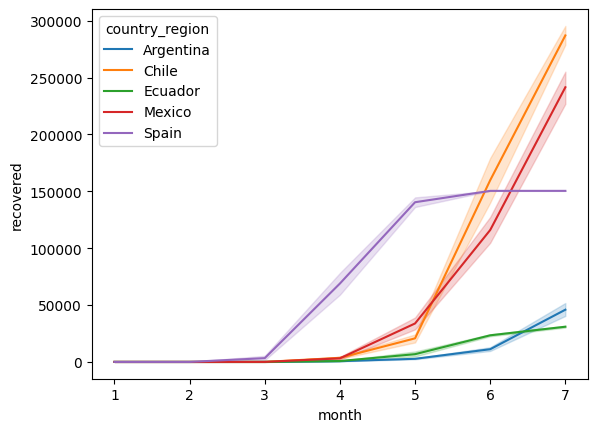

In [168]:
sns.lineplot(x="month", y="recovered", hue="country_region", data=df_filial)

<AxesSubplot: xlabel='date', ylabel='deaths'>

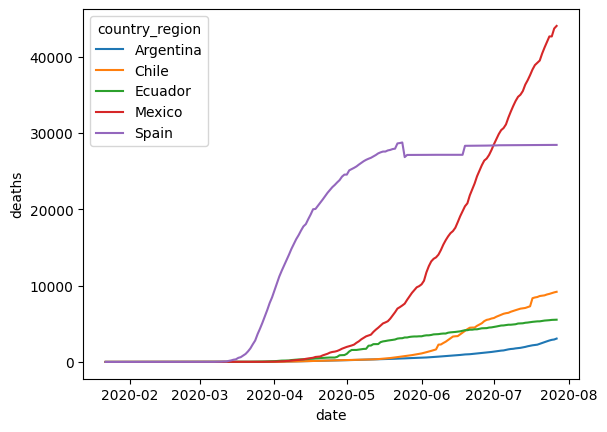

In [169]:
sns.lineplot(x="date", y="deaths", hue="country_region", data=df_filial)

<AxesSubplot: xlabel='month', ylabel='recovered'>

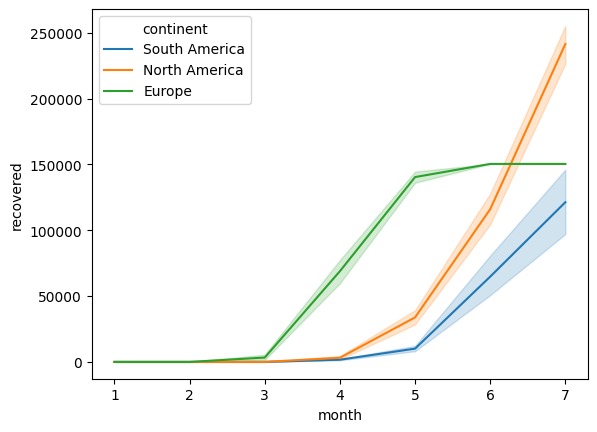

In [170]:
sns.lineplot(x="month", y="recovered", hue="continent", data=df_filial)

<AxesSubplot: xlabel='date', ylabel='deaths'>

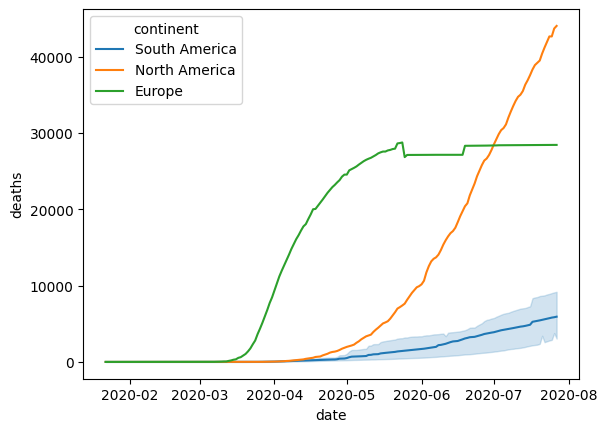

In [171]:
sns.lineplot(x="date", y="deaths", hue="continent", data=df_filial)

# Mundo inteiro

<AxesSubplot: xlabel='month', ylabel='deaths'>

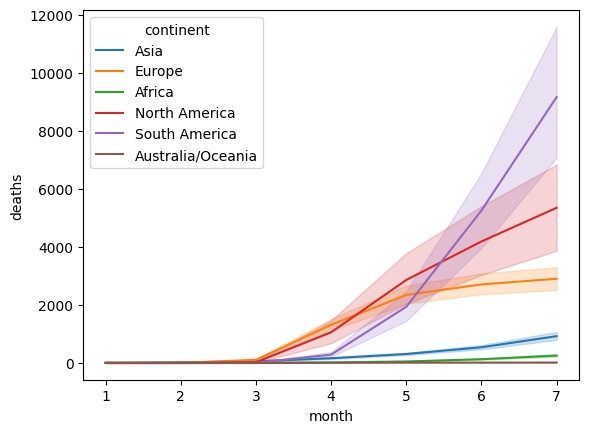

In [172]:
sns.lineplot(x="month", y="deaths", hue="continent", data=df)

<AxesSubplot: xlabel='date', ylabel='deaths'>

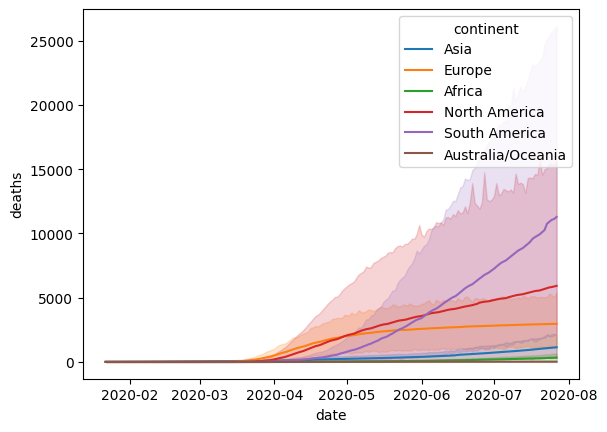

In [178]:
sns.lineplot(x="date", y="deaths", hue="continent", data=df)


# Valores finais (27/07/2020)

In [174]:
df_max = df_filial.loc[df_filial.date == df_filial.date.max()]

In [175]:
df_max.head()

,country_region,continent,population,date,month,day,confirmed,deaths,recovered,active,new cases,new deaths,death / 100.000 Hab,death / 100.000 hab
48813,Argentina,South America,45236884.0,2020-07-27,7,27,167416,3059,72575,91782,4890,120,6.762181,6.762181
48854,Chile,South America,19132514.0,2020-07-27,7,27,347923,9187,319954,18782,2133,75,48.017736,48.017736
48902,Ecuador,South America,17668824.0,2020-07-27,7,27,81161,5532,34896,40733,467,17,31.309384,31.309384
48963,Mexico,North America,129066160.0,2020-07-27,7,27,395489,44022,303810,47657,4973,342,34.108088,34.108088
49006,Spain,Europe,46756648.0,2020-07-27,7,27,272421,28432,150376,93613,0,0,60.808465,60.808465


<AxesSubplot: xlabel='country_region', ylabel='deaths'>

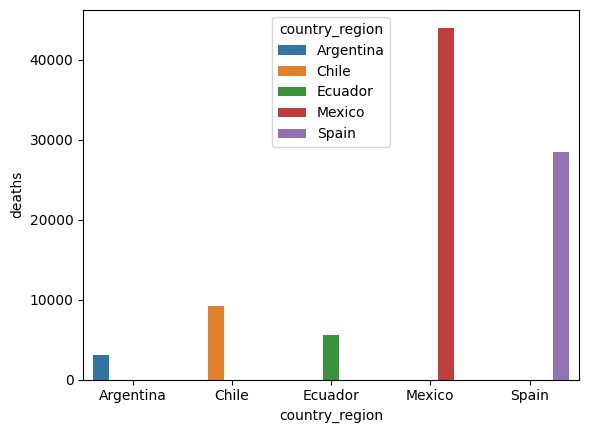

In [176]:
sns.barplot(x="country_region", y="deaths", hue="country_region", data=df_max)